In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%config InlineBackend.figure_format ='retina' 

# Numpy

In [3]:
import numpy as np

### Как задать numpy массив

Можно преобразовать список в массив

In [5]:
a = np.array([3, 4, 1])
print(a, type(a))

[3 4 1] <class 'numpy.ndarray'>


Массивы, заполненные нулями или единицами. Часто лучше сначала создать такой массив, а потом присваивать значения его элементам.

In [7]:
a = np.zeros(4)
print(a)

[0. 0. 0. 0.]


In [8]:
b = np.ones(3)
print(b)

[1. 1. 1.]


Массив из нулей с длиной как другой массив

In [10]:
np.ones_like(a)

array([1., 1., 1., 1.])

Функция `arange` подобна `range` для массив вида [0, 1, 2, 3,..]

In [12]:
a = np.arange(0, 9, 2)
print(a)

[0 2 4 6 8]


Последовательности чисел с постоянным шагом можно также создавать функцией `linspace`. Начало и конец диапазона включаются; последний аргумент - число точек.

In [14]:
c = np.linspace(0, 1, 101)
print(c)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


### Размеры массива 

`ndarray.ndim` — число осей (измерений) массива. 

`ndarray.shape` — размеры массива, его форма. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из `n` строк и `m` столбов, shape будет `(n,m)`. 


In [16]:
a = [[1, 2, 3], [2, 3, 1]]
a = np.array(a)
print('Массив:\n', a, '\n')

print('Размерность:', a.ndim)
print('Размеры:', a.shape)

Массив:
 [[1 2 3]
 [2 3 1]] 

Размерность: 2
Размеры: (2, 3)


### Операции с массивами

`numpy` содержит элементарные функции, которые применяются к массивам поэлементно

In [18]:
a = np.arange(0, 15, 2)
a = a.reshape((4, 2))
print(a)
print(a[0:2,:])
print(a[2:4,:])

[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]]
[[0 2]
 [4 6]]
[[ 8 10]
 [12 14]]


Константы

In [20]:
print(np.e, np.pi)

2.718281828459045 3.141592653589793


Сумма и произведение всех элементов массива; максимальный и минимальный элемент; среднее и среднеквадратичное отклонение.

In [22]:
print(a)
a.sum(), a.prod(), a.max(), a.min(), a.mean(), a.std()

[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]]


(56, 0, 14, 0, 7.0, 4.58257569495584)

Можно сгенерировать выборку из нормального распределения. Найдем ее выборочное среднее и выборочную дисперсию.

In [24]:
x = np.random.normal(size=1000)
x.mean(), x.std()

(0.03269667301460156, 1.0315622982600725)

Можно производить суммирования по строкам и столбцам

In [26]:
a = [[1, 2, 3], [2, 3, 1]]
a = np.array(a)

print(a)
print(a.mean(axis=0))

[[1 2 3]
 [2 3 1]]
[1.5 2.5 2. ]


Иногда бывает нужно использовать частичные (кумулятивные) суммы.

In [44]:
b = np.arange(1, 20, 1)
print(b.cumsum())

[  1   3   6  10  15  21  28  36  45  55  66  78  91 105 120 136 153 171
 190]


Объединение массивов "по-горизонтали" (horizontal stack).

In [30]:
a = np.array([1, 2, 3])
b = np.array([100, 200, 300])

print(np.hstack((a, b)))

[  1   2   3 100 200 300]


Объединение массивов "по-вертикали" (vertical stack).

In [32]:
print(np.vstack((a, b)))

[[  1   2   3]
 [100 200 300]]


### Маскирование вместо циклов

Массивы, разумеется, можно использовать в `for` циклах. Но при этом теряется главное преимущество `numpy` - быстродействие. Всегда, когда это возможно, лучше использовать операции над массивами как едиными целыми. Например использовать маски:

In [34]:
X = st.randint.rvs(low=0, high=10, size=5000)

Обычный цикл отработает дольше трех секунд

In [36]:
%%time
count = 0
for el in X:
    if el <= 3:
        count += 1
print(count)

2015
CPU times: user 502 μs, sys: 217 μs, total: 719 μs
Wall time: 676 μs


Маска будет выглядеть как вектор из `True` и `False`

In [38]:
print(X <= 3)

[ True  True False ... False False False]


Маска будет работать так: если на i-м месте вектора маски стоит `True`, то из i-й элемент массива напечатается, если `False`, то нет

In [40]:
a = np.array([1, 2, 3])
print(a[[True, False, True]])

[1 3]


С масками работает быстрее:

In [42]:
%%time
mask = X <= 3
count = X[mask].shape[0]
print(count)

2015
CPU times: user 225 μs, sys: 265 μs, total: 490 μs
Wall time: 335 μs


Для отрицания маски можно воспользоваться символом `~`

In [44]:
%%time
mask = X <= 3
count = X[~mask].shape[0]
print(count)

2985
CPU times: user 114 μs, sys: 54 μs, total: 168 μs
Wall time: 124 μs


# Matplotlib

In [46]:
import matplotlib.pyplot as plt

Чтобы отложить точки на графике используют метод `scatter`

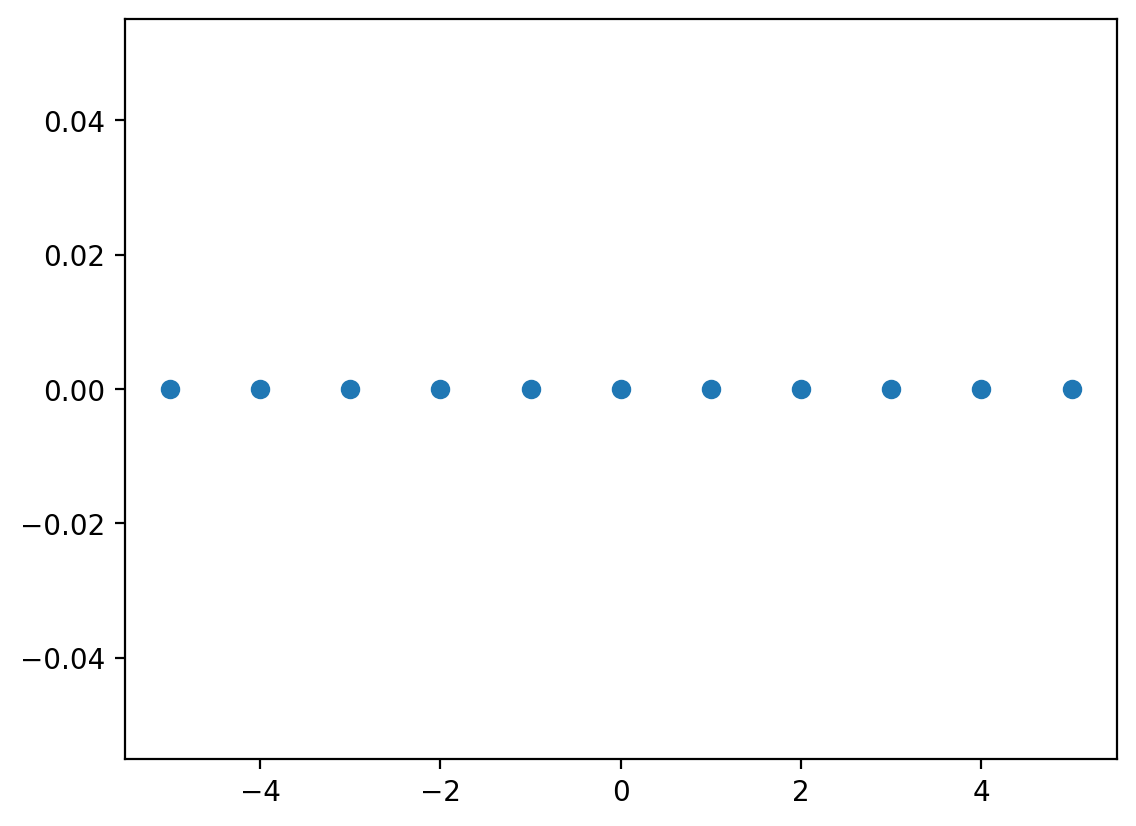

In [48]:
x = np.arange(-5, 6)
y = np.zeros_like(x)

plt.scatter(x, y)
plt.show()

In [49]:
print(x.shape)
print(y.shape)

(11,)
(11,)


Если надо соединить точки: `plot`

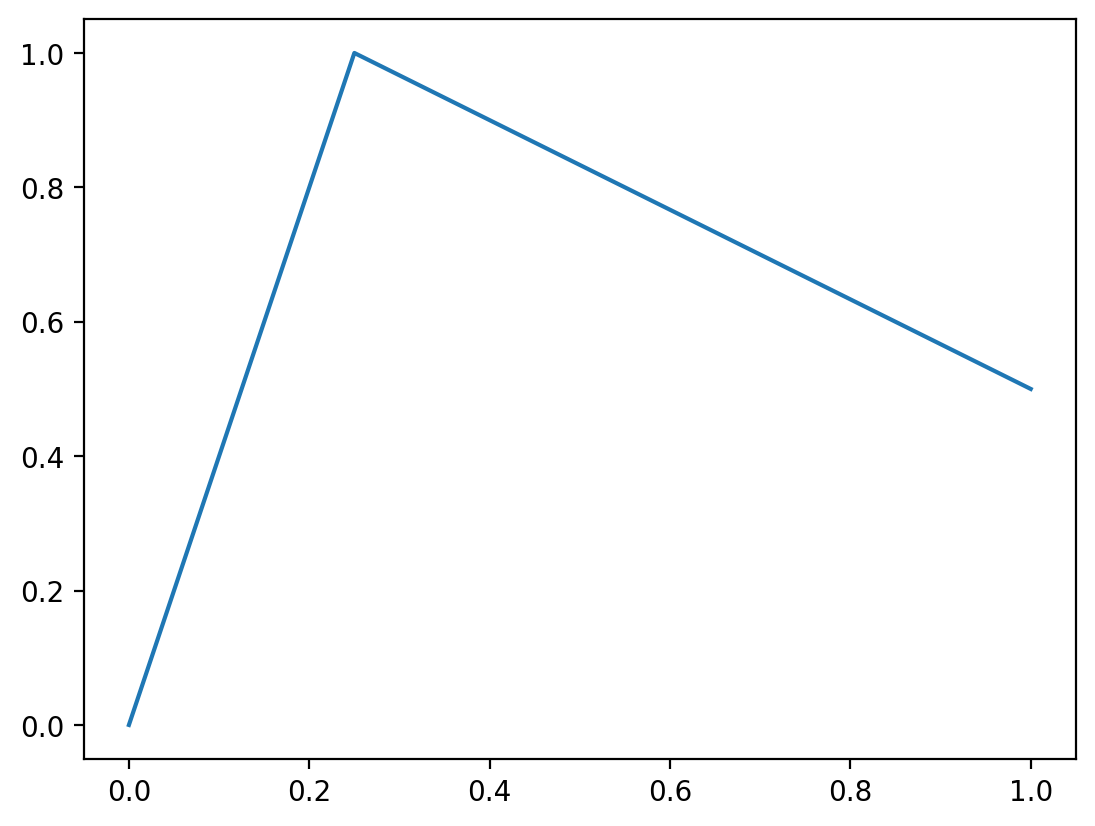

In [51]:
x = [0, 0.25, 1]
y = [0, 1, 0.5]

plt.plot(x, y)
plt.show()

Чтобы построить график синусоиды задаем сетку `grid` из 100 точек. К каждой точке сетки применяем функцию `numpy.sin()`, получаем значения синусоиды, соотвествующие точкам сетки. Затем строим график с помощью plot(). Получается график из ломаных, который близко описывает синусоиду. Чтобы сделать график более плавным можно увеличить число точек в сетке.

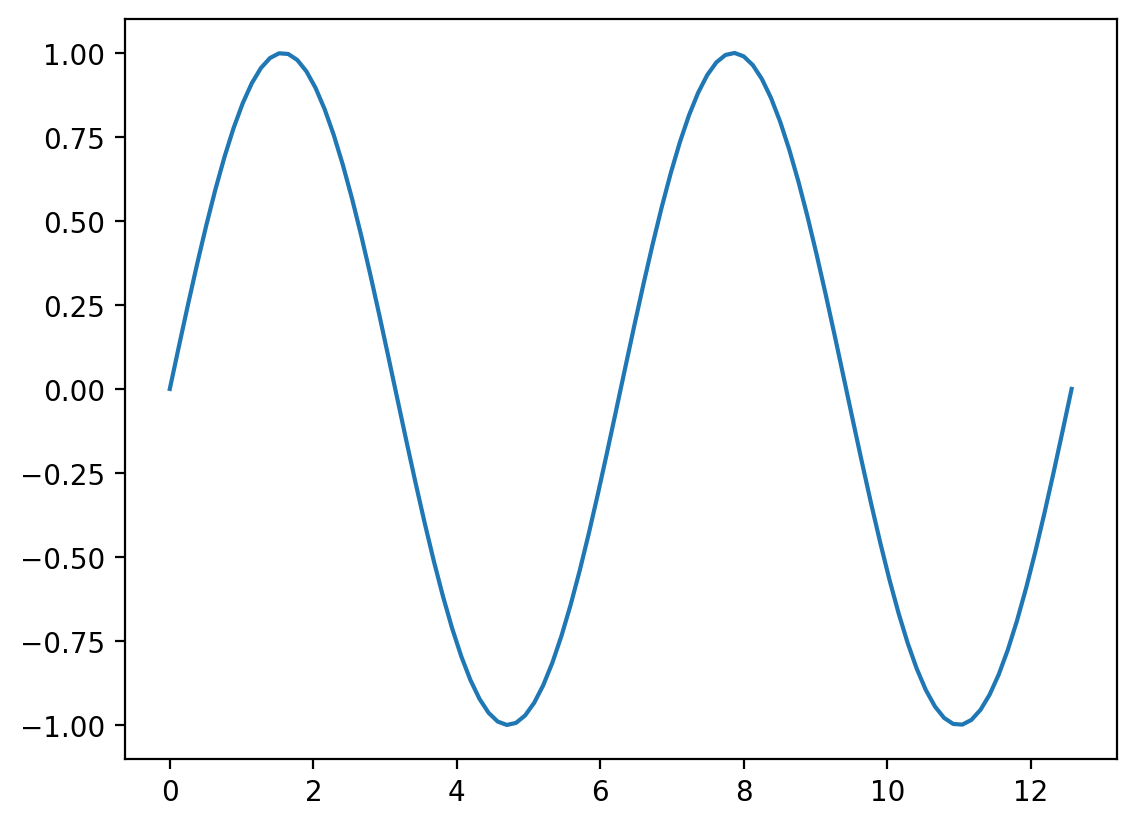

In [53]:
grid = np.linspace(0, 4 * np.pi, 100)

plt.plot(grid, np.sin(grid))
plt.show()

In [54]:
grid

array([ 0.        ,  0.12693304,  0.25386607,  0.38079911,  0.50773215,
        0.63466518,  0.76159822,  0.88853126,  1.01546429,  1.14239733,
        1.26933037,  1.3962634 ,  1.52319644,  1.65012947,  1.77706251,
        1.90399555,  2.03092858,  2.15786162,  2.28479466,  2.41172769,
        2.53866073,  2.66559377,  2.7925268 ,  2.91945984,  3.04639288,
        3.17332591,  3.30025895,  3.42719199,  3.55412502,  3.68105806,
        3.8079911 ,  3.93492413,  4.06185717,  4.1887902 ,  4.31572324,
        4.44265628,  4.56958931,  4.69652235,  4.82345539,  4.95038842,
        5.07732146,  5.2042545 ,  5.33118753,  5.45812057,  5.58505361,
        5.71198664,  5.83891968,  5.96585272,  6.09278575,  6.21971879,
        6.34665183,  6.47358486,  6.6005179 ,  6.72745093,  6.85438397,
        6.98131701,  7.10825004,  7.23518308,  7.36211612,  7.48904915,
        7.61598219,  7.74291523,  7.86984826,  7.9967813 ,  8.12371434,
        8.25064737,  8.37758041,  8.50451345,  8.63144648,  8.75

# Scipy.stats

Список с распределениями, поддерживаемыми библиотекой

https://docs.scipy.org/doc/scipy/reference/stats.html

In [56]:
import scipy.stats as st

- rvs –– *Random variates*
- pdf –– *Probability density function* –– плотность распределения
- cdf –– *Cumulative distribution function* –– функция распределения
- ppf –– *Percent point function* –– обратная к cdf, то есть для заданного значения функции распределения возвращает точку при которой достигается это значение.


### График плотности нормального распределения

Плотность нормального распределения задана на всем $\mathbb{R}$, поэтому для построения графика надо отрезать хвосты распределения. Для этого воспользуемся `ppf`. 

Вспомним правило трех сигм: вероятность того, что случайная величина не отклонится от своего математического ожидания более чем на три среднеквадратических отклонения, равна $99.72\%$. Поэтому в качестве крайней левой точки возьмем знчение `x = st.norm.ppf(0.001)` -- выкинем 0.1\% плотности левого хвоста. Аналогично с правыым хвостом.

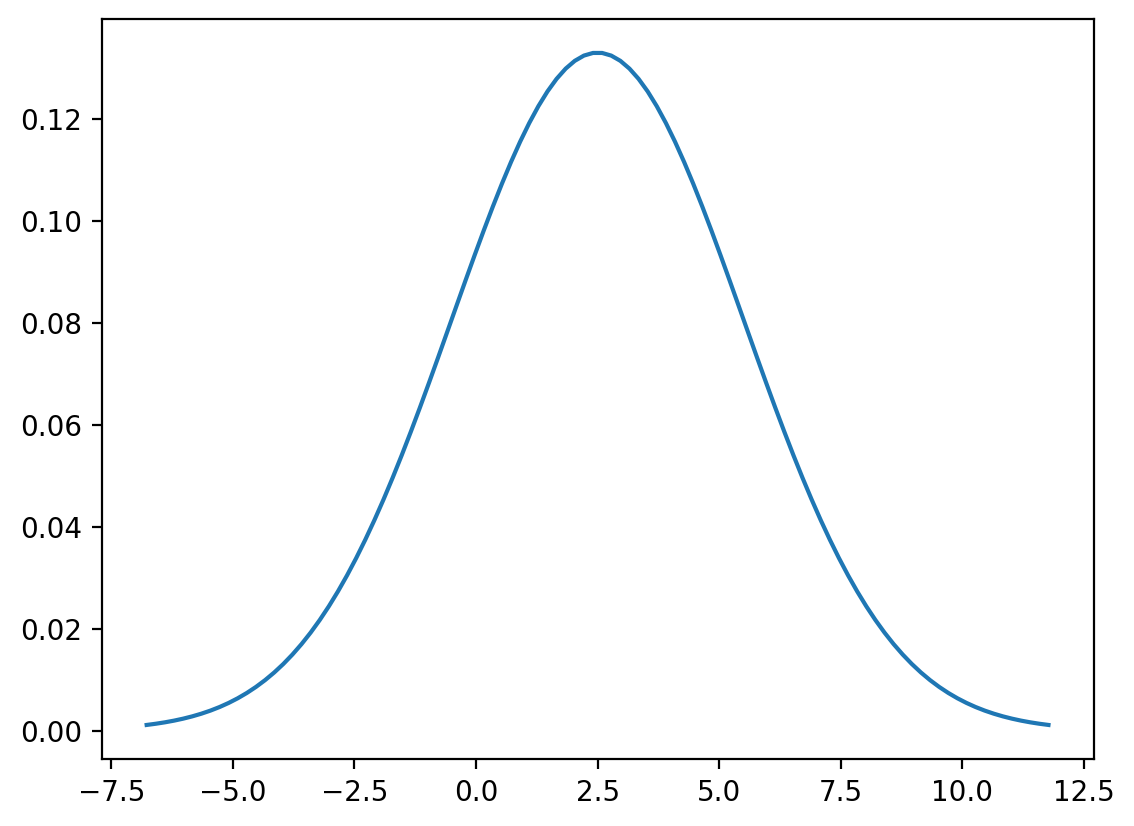

In [59]:
grid = np.linspace(st.norm.ppf(0.001, loc=2.5, scale=3), st.norm.ppf(0.999, loc=2.5, scale=3), 100)

# У Norm параметр scale это просто sigma
plt.plot(grid, st.norm.pdf(grid, loc=2.5, scale=3))
plt.show()

### Функция распределения нормального распределения

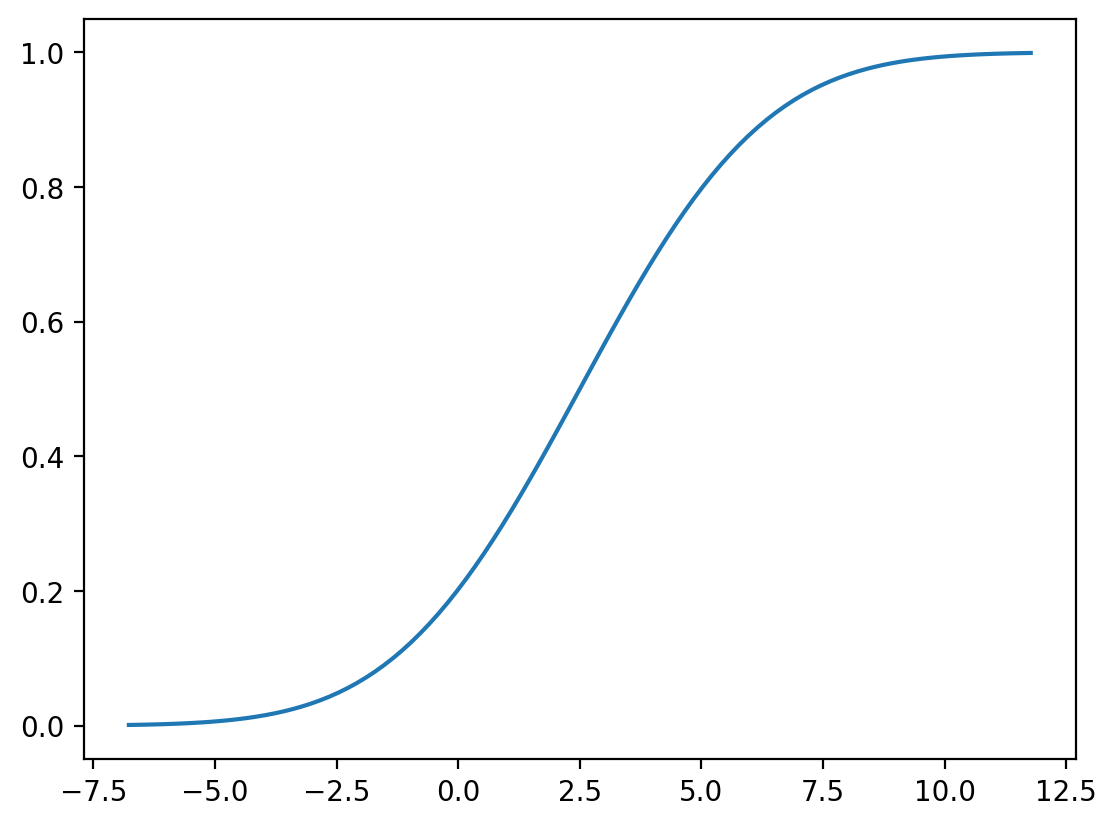

In [61]:
plt.plot(grid, st.norm.cdf(grid, loc=2.5, scale=3))
plt.show()

### 0.025-квантиль

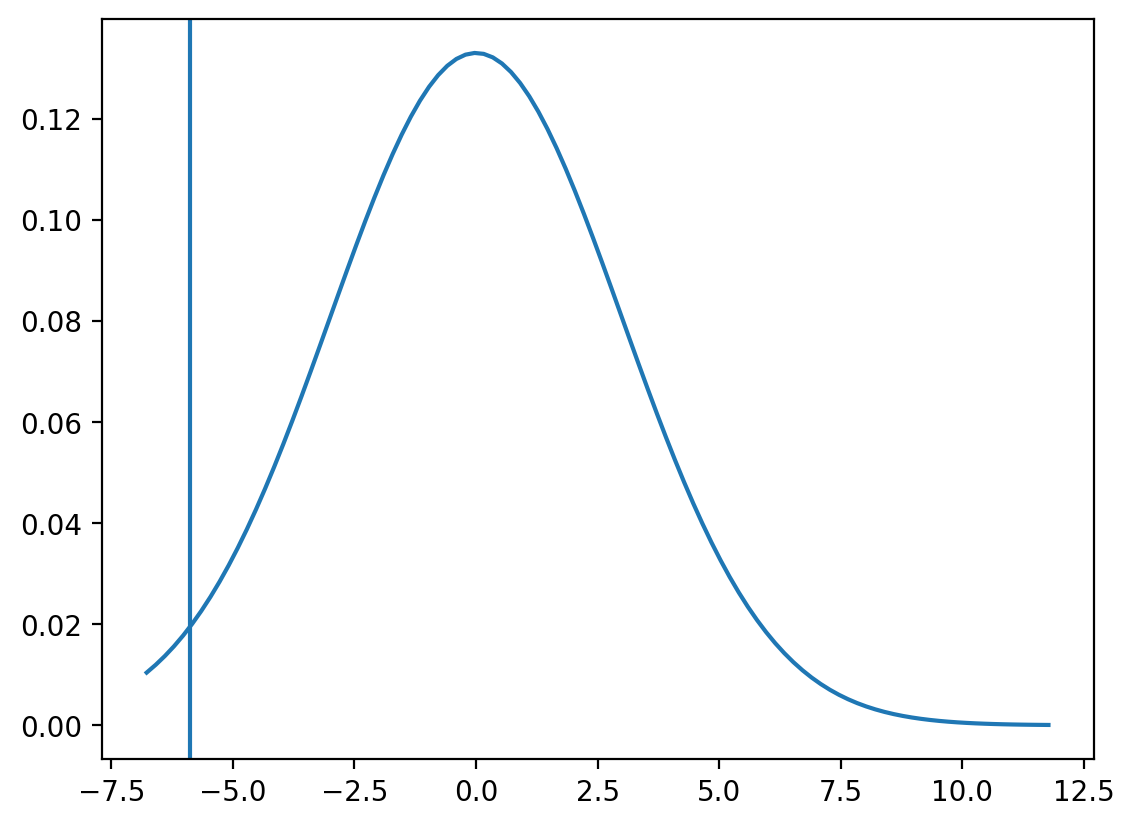

In [63]:
plt.axvline(st.norm.ppf(0.025, scale=3))
plt.plot(grid, st.norm.pdf(grid, scale=3))
plt.show()

Как тут https://openintro.shinyapps.io/dist_calc/ визуализируем вычисление $P(X <= a)$

$P(X <= a)$ это по определению значение функции распределения $F_X(x)$ в точке $a$. Поэтому используем метод `cdf(a)`

In [65]:
from ipywidgets import interactive
from IPython import display

Площадь P(X <= c): 0.5000


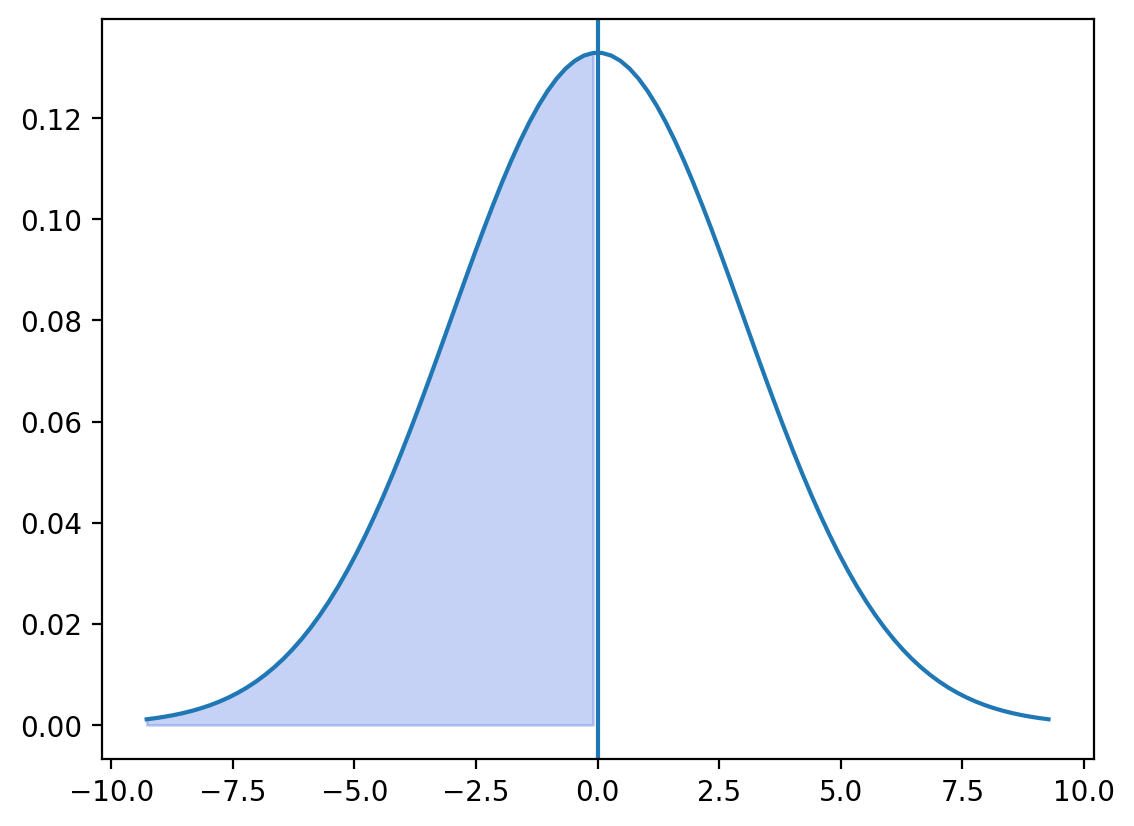

interactive(children=(FloatSlider(value=0.0, description='c', max=10.0, min=-10.0, step=0.25), Output()), _dom…

In [66]:
def ppf_visualization(c):
    print('Площадь P(X <= c):', '%.4f' % (st.norm.cdf(c, scale=3)))
    
    grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=3), st.norm.ppf(0.999, loc=0, scale=3), 100)

    # Вертикальная линия
    plt.axvline(c)
    # График плотности распределения
    plt.plot(grid, st.norm.pdf(grid, scale=3))
    # Заполним пространство под графиком плотности левее  вертикальной линии
    plt.fill_between(grid[grid<c], st.norm.pdf(grid[grid<c], loc=0, scale=3), color="royalblue", alpha=0.3)
    plt.show()

v = interactive(
    lambda c: ppf_visualization(c), c=(-10, 10, 0.25),
)

display.display(v)

### Выборочные статистики

Сгенерируем $N = 10$ реализаций нормально распределенной случайной величины из $\mathcal{N}(0,1)$. То есть получим массив из 10 реализаций случайной величины.

In [68]:
N = 10
x = st.norm.rvs(loc=0, scale=1, size=N)
print('Выборка:', x)

Выборка: [-0.08772711  0.74672494 -0.04845199 -0.76228442 -1.45382015 -0.54907683
  0.28865332  1.28252125 -0.52879887  1.18139407]


Можно использовать все что есть в `numpy`:

In [70]:
print(type(x))
print('Выборочное среднее:\t', "%.4f" %x.mean())
print('Выборочная медиана:\t', "%.4f" % np.median(x))
print('Выборочная дисперсия:\t', "%.4f" % x.std())
print('Максимальное значение:\t', "%.4f" % x.max())
print('Минимальное значение:\t', "%.4f" % x.min())

<class 'numpy.ndarray'>
Выборочное среднее:	 0.0069
Выборочная медиана:	 -0.0681
Выборочная дисперсия:	 0.8347
Максимальное значение:	 1.2825
Минимальное значение:	 -1.4538


**Пример:** Логнормальное распределение

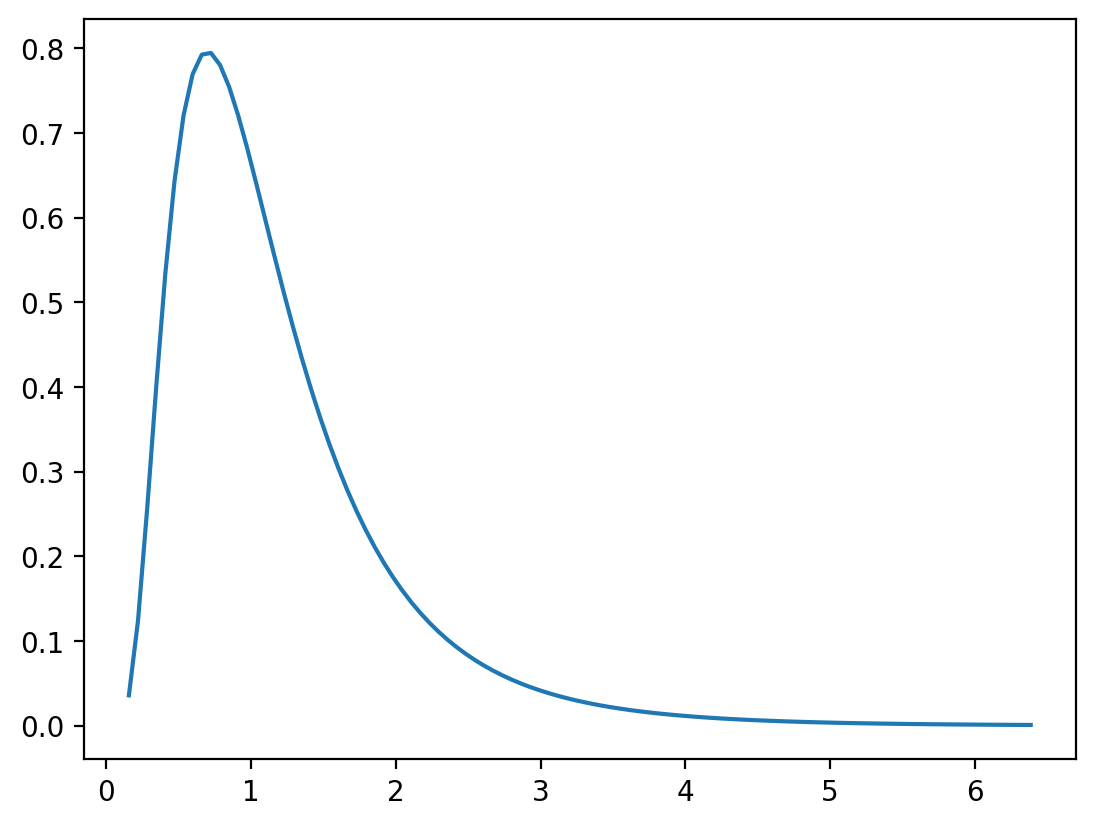

Теоретическое среднее:			 1.1972
Теоретическая медиана:			 1.0000
Теоретическая дисперсия:		 0.6211
Теоретический коэффициент ассиметрии:	 2.2601
Теоретический коэффициент эксцесса:	 10.2734


In [72]:
s = 0.6

grid = np.linspace(st.lognorm.ppf(0.001, s), st.lognorm.ppf(0.999, s), 100)

plt.plot(grid, st.lognorm.pdf(grid, s))
plt.show()

mean, var, skew, kurt = st.lognorm.stats(s, moments='mvsk')
median = st.lognorm.median(s)
print('Теоретическое среднее:\t\t\t', "%.4f" % mean)
print('Теоретическая медиана:\t\t\t', "%.4f" % median)
print('Теоретическая дисперсия:\t\t', "%.4f" % var)
print('Теоретический коэффициент ассиметрии:\t', "%.4f" % skew)
print('Теоретический коэффициент эксцесса:\t', "%.4f" % kurt)

Выборочный коэффициент ассиметрии:	 2.1925
Выборочный коэффициент эксцесса:	 8.5753
Интерквартильынй размах:		 0.8423


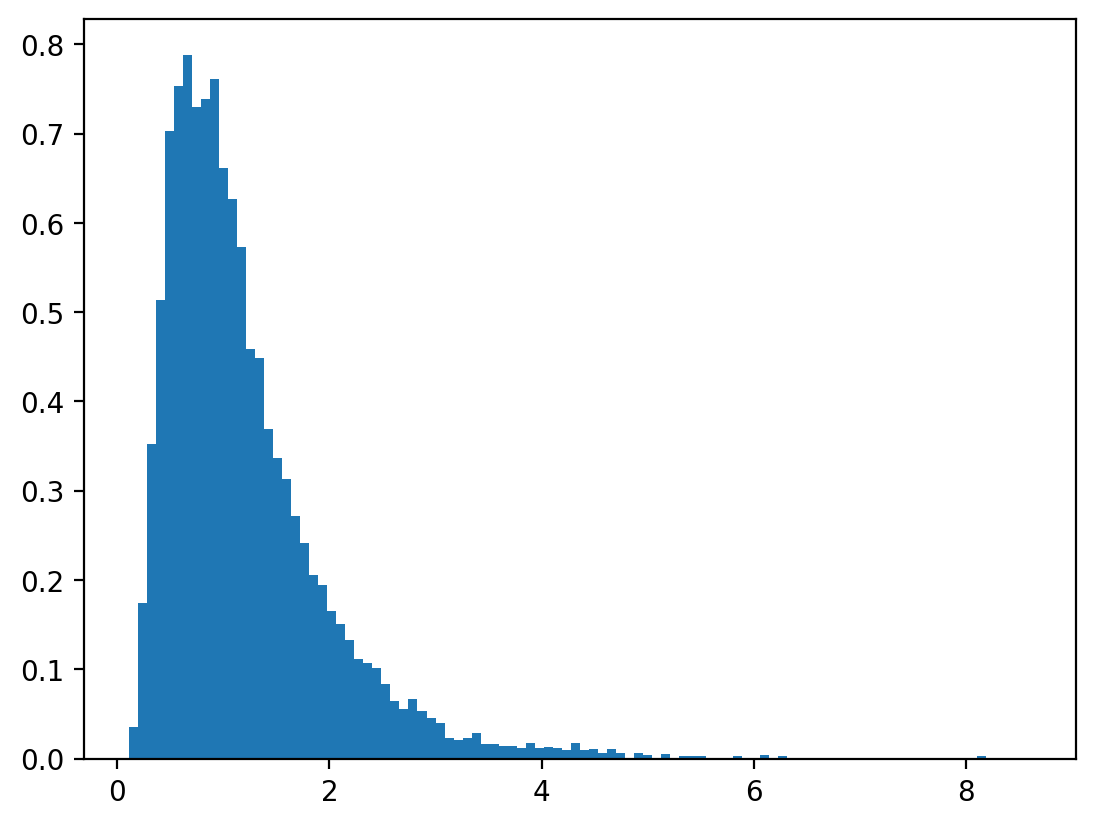

In [73]:
N = 10000
s = 0.6
X = st.lognorm.rvs(s, size=N)

plt.hist(X, density=True, bins=100)

print('Выборочный коэффициент ассиметрии:\t', "%.4f" % st.skew(X))
print('Выборочный коэффициент эксцесса:\t', "%.4f" % st.kurtosis(X))
print('Интерквартильынй размах:\t\t', "%.4f" % st.iqr(X))

**Пример**: Экспоненциальное распределение $\text{Exp}(3)$

- Сгенерируем выборку
- Построим плотность распределения
- Построим гистограмму по выборке



Выборочное среднее: 0.34478433616017573


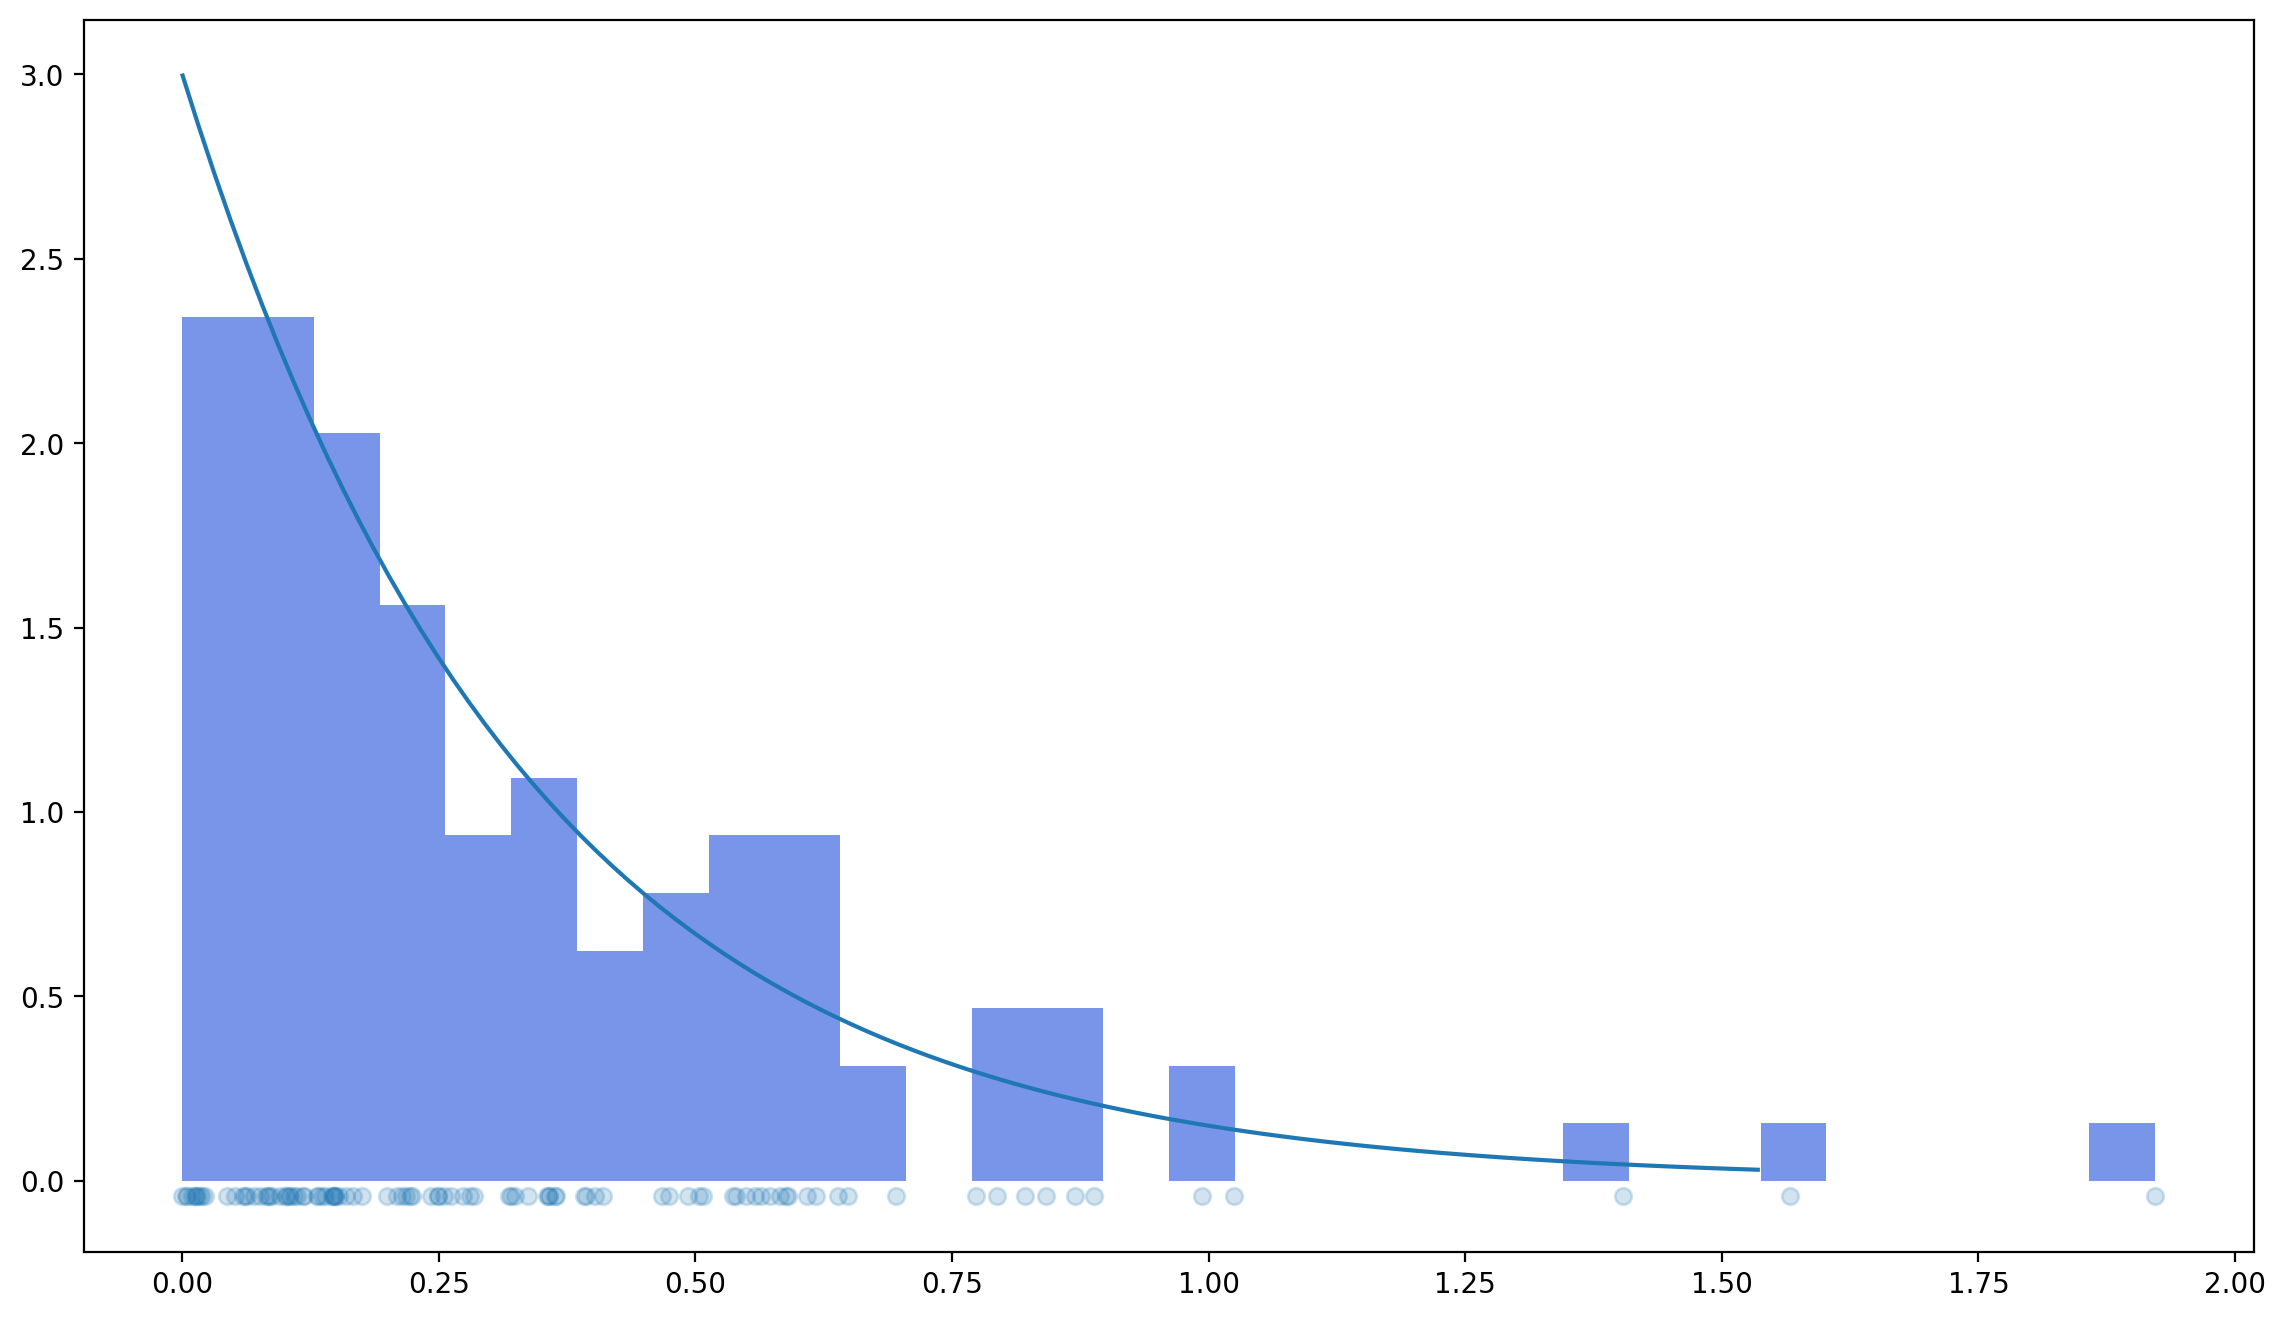

In [75]:
# Размер выборки
N = 100
# У Expon параметр scale это 1/lambda
scale=1/3

X = st.expon.rvs(scale=scale, size=N)
print('Выборочное среднее:', X.mean())

# Сетка для построения графика плотности
grid = np.linspace(st.expon.ppf(scale=scale, q=0.001), 
                   st.expon.ppf(scale=scale, q=0.99), 100)

# Размер полотна
plt.figure(figsize=(14,8))
# Плотность распределения
plt.plot(grid, st.expon.pdf(grid, scale=scale))
# Реализации выборки
plt.scatter(X, np.zeros(N)-0.04, alpha=0.2) #alpha -- прозрачность
# Гистограмма
plt.hist(X, bins=30, density=True, color='royalblue', alpha=0.7)

plt.show()

# ЦПТ

Хотим посмотреть как распределено среднее значение выборки, соответсвующей $\text{Exp}(3)$. В этом случае будет удобно сразу сгенерировать матрицу, состоящую из значений случайной величины из $\text{Exp}(3)$. Затем посчитаем значение статистики для каждой строки.

ЦПТ:
$$\frac{\sum\limits_{i=1}^nX_i - n \cdot \mathbb{E}X_1}{\sigma\sqrt{n}} \to^d \mathcal{N}(0,1)$$

Дано:
$$X \sim \text{Exp}(3), \mathbb{E}X = \frac{1}{3}, \sigma^2 = \mathbb{D}X = \frac{1}{9}$$

ЦПТ:
$$\frac{\sum\limits_{i=1}^nX_i - \frac{1}{3}n}{\frac{1}{3}\sqrt{n}} \to^d \mathcal{N}(0,1)$$

$$\frac{n}{n}\frac{\sum\limits_{i=1}^nX_i - \frac{1}{3}n}{\frac{1}{3}\sqrt{n}} \to^d \mathcal{N}(0,1)$$

$$\frac{\sum\limits_{i=1}^nX_i}{n} - \frac{1}{3} \to^d \mathcal{N}\left(0,\frac{1}{9}\frac{1}{n}\right)$$

$$\frac{\sum\limits_{i=1}^nX_i}{n} \to^d \mathcal{N}\left(\frac{1}{3},\frac{1}{9}\frac{1}{n}\right)$$

In [77]:
def clt_visualization_exp(N, n_experiments=1000):
    print('Размер выборки:', N)

    # У Expon параметр scale это 1/lambda
    scale=1/3

    # Задаем размер матрицы: size=(n_experiments, N) 
    X = st.expon.rvs(scale=scale, size=(n_experiments, N))
    means = X.mean(axis=1)
    print('Выборочный коэффициент ассиметрии:', "%.4f" % st.skew(means))

    # Сетка для построения графика плотности
    grid = np.linspace(st.norm.ppf(loc=1/3, scale=(1/9 * 1/N)**0.5, q=0.001), 
                    st.norm.ppf(loc=1/3, scale=(1/9 * 1/N)**0.5, q=0.999), 100)
    plt.plot(grid, st.norm.pdf(grid, loc=1/3, scale=(1/9 * 1/N)**0.5))

    plt.hist(means, density=True, color='royalblue', alpha=0.8)
    
    plt.show()

Размер выборки: 2
Выборочный коэффициент ассиметрии: 1.2908


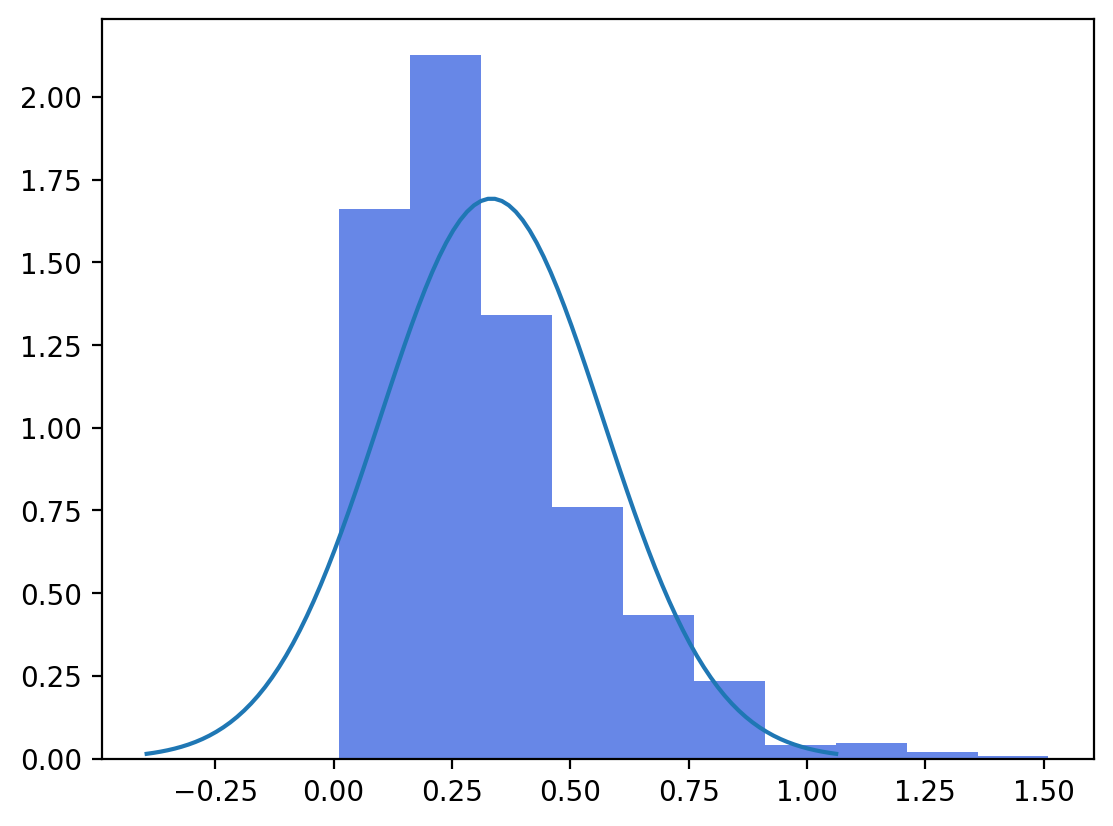

Размер выборки: 5
Выборочный коэффициент ассиметрии: 0.9740


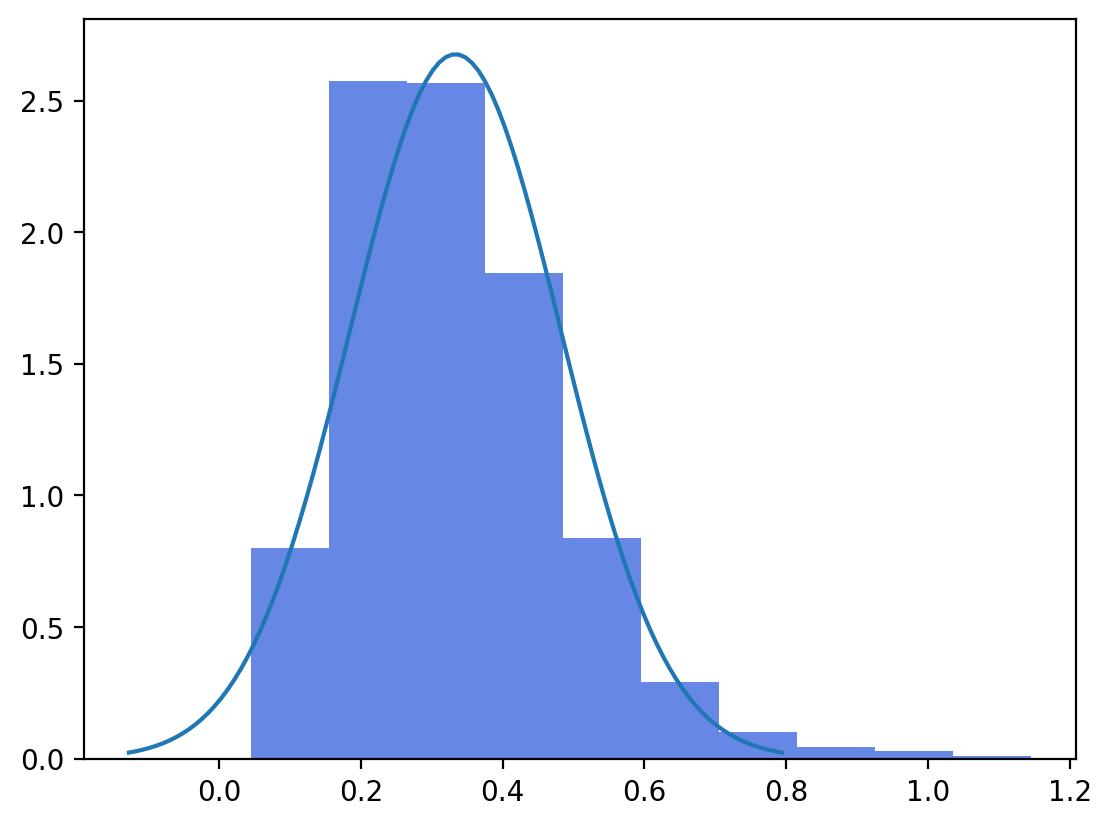

Размер выборки: 25
Выборочный коэффициент ассиметрии: 0.3633


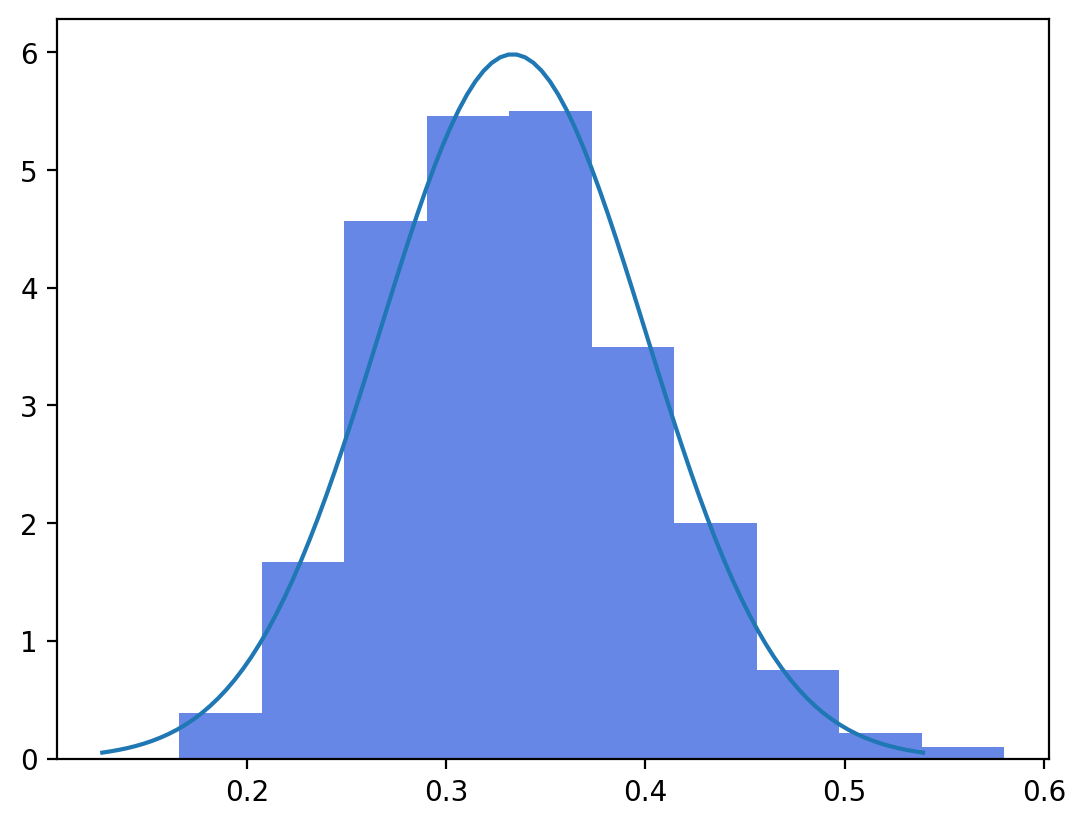

Размер выборки: 100
Выборочный коэффициент ассиметрии: 0.2030


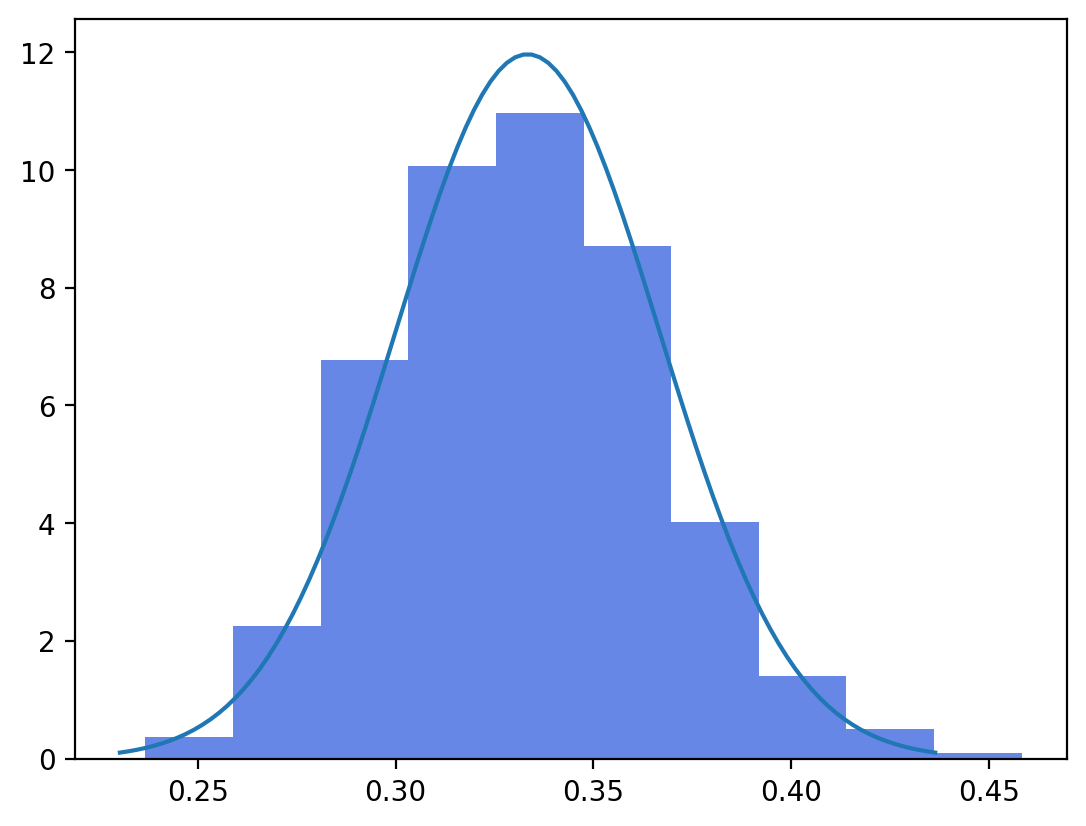

Размер выборки: 1000
Выборочный коэффициент ассиметрии: 0.1029


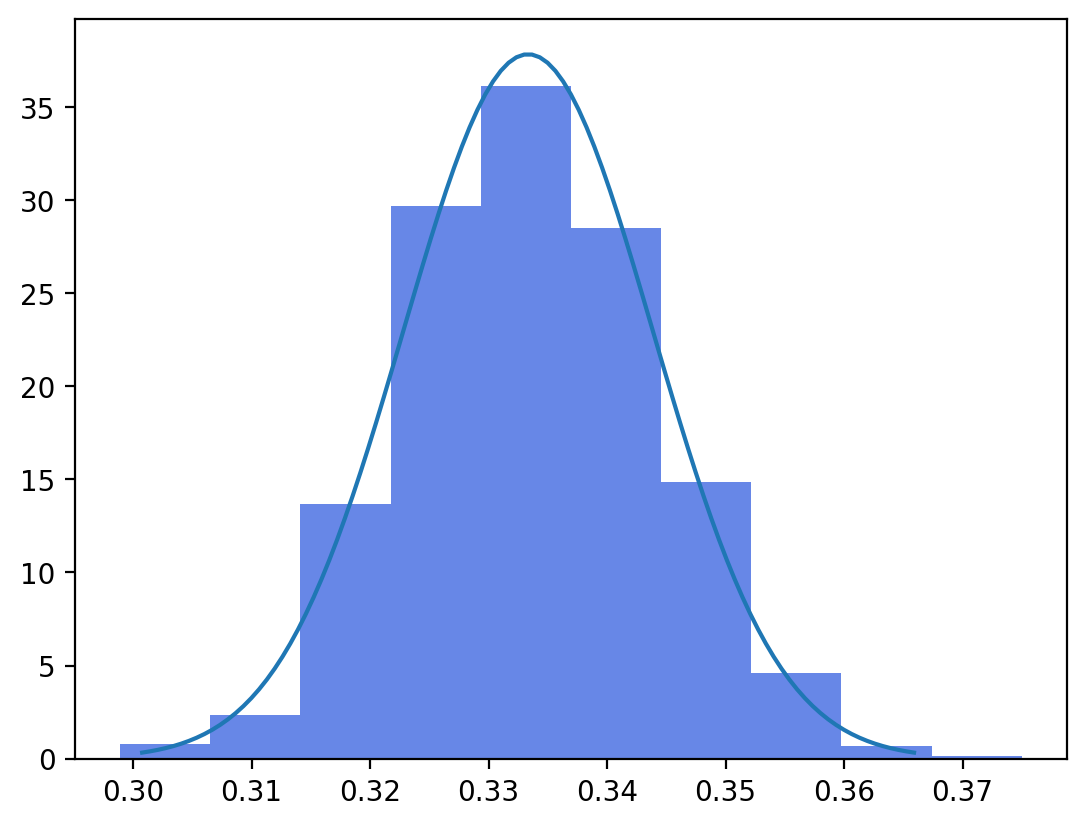

In [78]:
clt_visualization_exp(2)
clt_visualization_exp(5)
clt_visualization_exp(25)
clt_visualization_exp(100)
clt_visualization_exp(1000)

# Распределение с произвольной плотностью 

Напишем класс для случаной величины имеющей плотность
$$p(x) = 
\begin{cases}
3x^2, 0 \leqslant x \leqslant 1;\\
0
\end{cases}.$$

$$\int_{0}^{1} p(x)dx = \int_{0}^{1} 3x^2dx = x^3|_0^1 = 1.$$

In [80]:
class my_continuous_pdf(st.rv_continuous):
    def _pdf(self,x):
        return 3*x**2

my_cv = my_continuous_pdf(a=0, b=1, name='my_continuous_pdf')

mean, var, skew, kurt = my_cv.stats(moments='mvsk')
median = my_cv.median()

print('Теоретическое среднее:\t\t\t', "%.4f" % mean)
print('Теоретическая медиана:\t\t\t', "%.4f" % median)
print('Теоретическая дисперсия:\t\t', "%.4f" % var)
print('Теоретический коэффициент ассиметрии:\t', "%.4f" % skew)
print('Теоретический коэффициент эксцесса:\t', "%.4f" % kurt)

Теоретическое среднее:			 0.7500
Теоретическая медиана:			 0.7937
Теоретическая дисперсия:		 0.0375
Теоретический коэффициент ассиметрии:	 -0.8607
Теоретический коэффициент эксцесса:	 0.0952


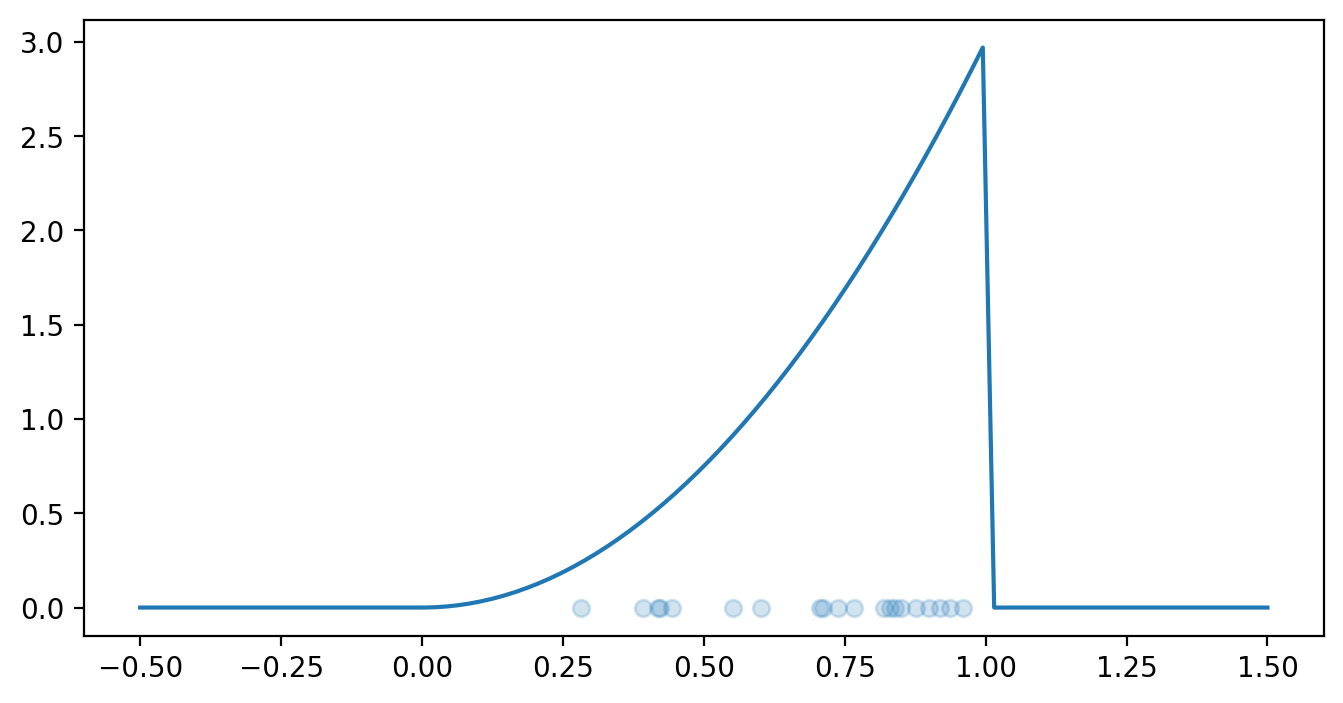

In [81]:
X = my_cv.rvs(size=20)

grid = np.linspace(-0.5, 1.5, 100)

plt.figure(figsize=(8,4))
plt.plot(grid, my_cv.pdf(grid))
plt.scatter(X, np.zeros_like(X), alpha=0.2)
plt.show()

# Как оценить вероятность с помощью геометрии

**Пример:** вычисление числа $\pi$.

Такой подход называется Методом Монте-Карло. Существует теоретическая оценка скорости сходимости метода МК: ошибка убывает как $\mathcal{O}\left(\dfrac{1}{\sqrt{N}}\right)$.

$$p = \dfrac{\pi R^2}{4}$$ 

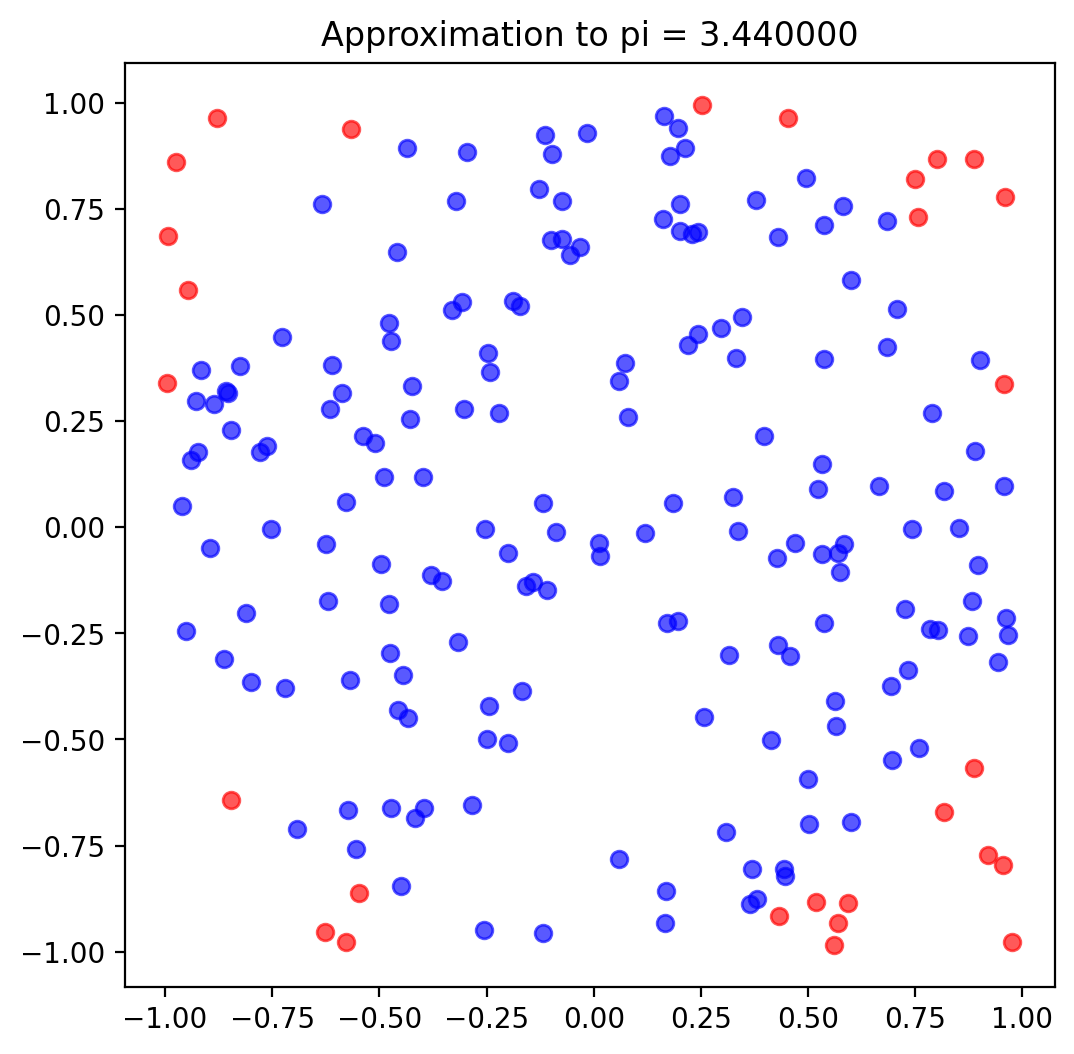

In [83]:
N_points = 200
X = st.uniform.rvs(loc=-1, scale=2, size=N_points)
Y = st.uniform.rvs(loc=-1, scale=2, size=N_points)

r2 = X ** 2 + Y ** 2
mask_inside = r2 < 1

plt.figure(figsize=(6,6))

plt.title("Approximation to pi = %f" % (4*mask_inside.sum()/float(N_points)))

plt.scatter(X[mask_inside], Y[mask_inside], c='b', alpha=0.65)
plt.scatter(X[~mask_inside], Y[~mask_inside], c='r', alpha=0.65)

plt.show()

### Задание 1.

Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпи\-рической функции
распределения (отметьте на оси абсцисс точки "скачков" кривых,
нанеся каждую из "подвыборок" на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различныз значений $n$). 

Будет полезно: https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html

In [85]:
from scipy.stats import norm, ecdf

In [86]:
X = norm.rvs(size=10000)

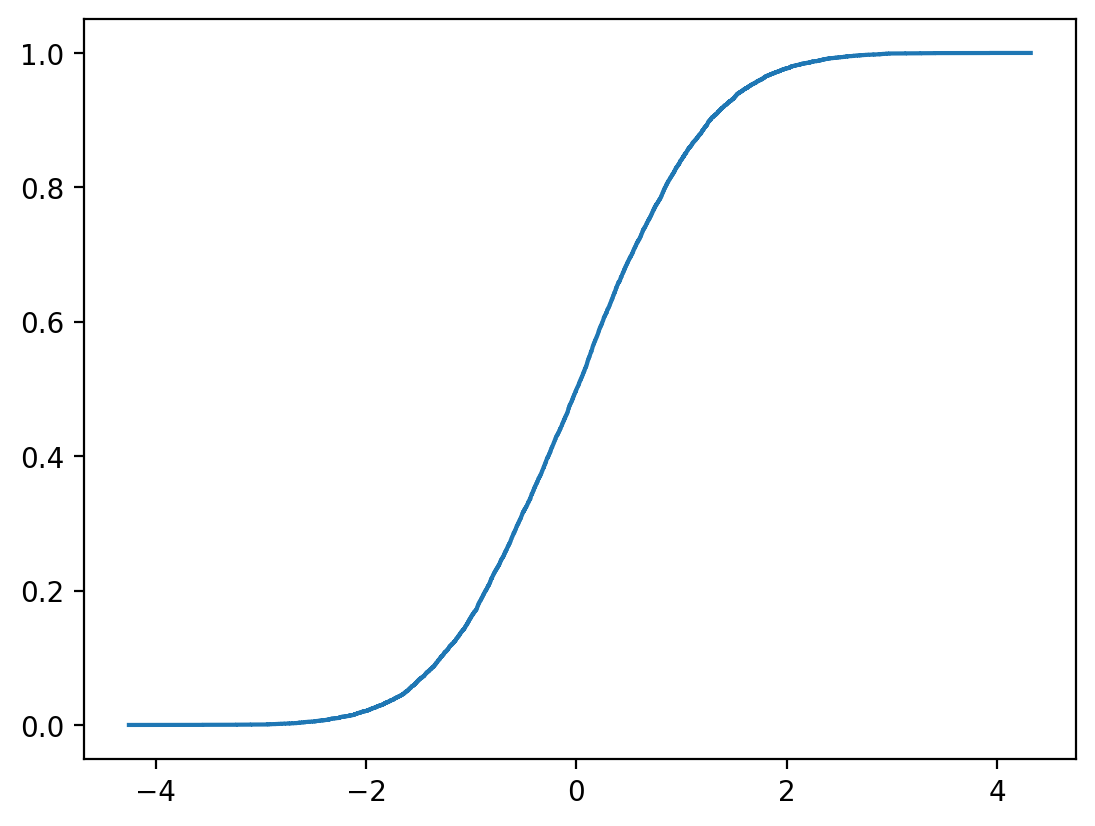

In [87]:
grid = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)

res = ecdf(X)
ax = plt.subplot()
res.cdf.plot(ax)
plt.show()

#plt.plot(grid, )

### Задание 2. Задача Бюффона о бросании иглы


**Пример:** вычисление числа $\pi$, задача Бюффона о бросании иглы.

На разлинованный лист бумаги, расстояния между линиями $r=1$ бросают иглы длиной $L < r$. Считают сколько раз игла пересекла линию.

Для этой задачи существует теоретическое решение:

$$p = \dfrac{2L}{r\pi}$$.

Проведем эксперимент, найдем вероятность пересечения иглой линнии. С помощью теоретического решения найдем значение числа $\pi$.

https://ru.wikipedia.org/wiki/Задача_Бюффона_о_бросании_иглы

Сгенерируем две случайные величины $X1$ и $Y1$ из равномерного распределения. Они будут отвечать за начальную точку иглы. Сгенерируем случайную величину $\alpha$ из $U[0, 2\pi]$, она будет отвечать за угол между иглой и горизонтальной осью.

Так как расстояние между линиями 1, то пересечение иглы с линией можно найти так: спроецируем иглы на вертикальную ось, получим отрезки $[y_2, y_1]$. Если в пределах отрезка $[y_2, y_1]$ лежит целое число, значит проекция, а соотвественно и игла, пересекают горизонтальную ось.


Что еще посмотреть:

1. Частично похоже на этот ноутбук, но более обще: https://nbviewer.jupyter.org/gist/rpmuller/5920182 (в конце еще много ссылок)
2. Еще немного тем по DS на Python: https://nagornyy.me/courses/data-science/
3. Галерея интересных Jupyter Notebook: https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks
4. Очень полезные трюки в Jupyter Notebook:
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
